In [35]:
!pip install labelme tensorflow opencv-python matplotlib albumentations

In [150]:
import os
import time
import uuid
import cv2

In [19]:
IMAGES_PATH = os.path.join('data','images')
number_images = 90

In [20]:
cap = cv2.VideoCapture(0)
for imgnum in range(number_images):
    print('Collecting image {}'.format(imgnum))
    ret, frame = cap.read()
    imgname = os.path.join(IMAGES_PATH,f'{str(uuid.uuid1())}.jpg')
    cv2.imwrite(imgname, frame)
    cv2.imshow('frame', frame)
    time.sleep(0.5)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

In [21]:
!labelme

2024-06-08 12:53:31,172 [INFO   ] __init__:get_config:67- Loading config file from: C:\Users\ebeng\.labelmerc


In [152]:
import tensorflow as tf
import json
import numpy as np
from matplotlib import pyplot as plt

In [154]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [156]:
tf.config.list_physical_devices('GPU')

[]

In [158]:
images = tf.data.Dataset.list_files('data\\images\\*.jpg')

In [160]:
images.as_numpy_iterator().next()

b'data\\images\\01eebdae-251b-11ef-aa46-d7c038dcdc8b.jpg'

In [162]:
def load_image(x): 
    byte_img = tf.io.read_file(x)
    img = tf.io.decode_jpeg(byte_img)
    return img

In [164]:
images=images.map(load_image)

In [166]:
images.as_numpy_iterator().next()

array([[[254, 255, 255],
        [254, 255, 255],
        [254, 255, 255],
        ...,
        [138, 148, 149],
        [139, 150, 152],
        [135, 149, 150]],

       [[253, 255, 254],
        [253, 255, 254],
        [253, 255, 254],
        ...,
        [139, 147, 149],
        [138, 149, 151],
        [139, 150, 152]],

       [[252, 254, 253],
        [252, 254, 253],
        [252, 254, 253],
        ...,
        [139, 144, 147],
        [134, 142, 145],
        [137, 147, 149]],

       ...,

       [[ 57,  29,  17],
        [ 56,  28,  16],
        [ 57,  30,  19],
        ...,
        [ 22,  18,  15],
        [ 22,  18,  15],
        [ 21,  17,  14]],

       [[ 60,  31,  17],
        [ 60,  31,  17],
        [ 60,  32,  20],
        ...,
        [ 23,  19,  18],
        [ 24,  20,  19],
        [ 28,  24,  23]],

       [[ 63,  34,  20],
        [ 62,  33,  19],
        [ 59,  29,  18],
        ...,
        [ 29,  25,  24],
        [ 26,  22,  23],
        [ 28,  24,  25]]

In [168]:
type(images)

tensorflow.python.data.ops.map_op._MapDataset

In [170]:
image_generator=images.batch(3).as_numpy_iterator()

In [172]:
plot=image_generator.next()

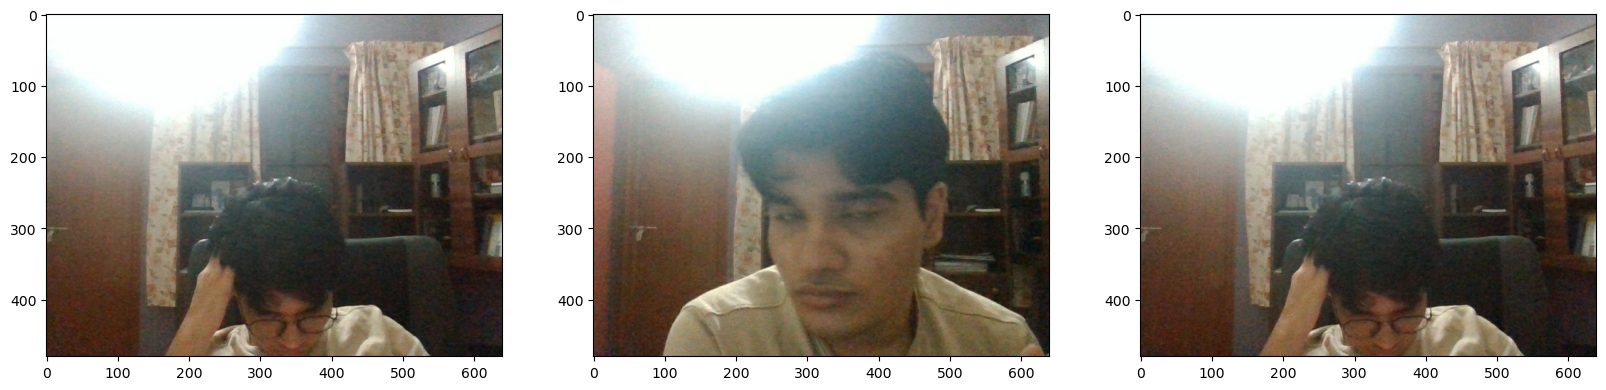

In [174]:
fig, ax = plt.subplots(ncols=3,figsize=(20,20))
for idx, image in enumerate(plot):
    ax[idx].imshow(image) 
plt.show()

In [175]:
120*0.8

96.0

In [178]:
96-72

24

In [180]:
24*0.5

12.0

In [182]:
for folder in ['train','test','val']:
    for file in os.listdir(os.path.join('data', folder, 'images')):
        
        filename = file.split('.')[0]+'.json'
        existing_filepath = os.path.join('data','labels', filename)
        if os.path.exists(existing_filepath): 
            new_filepath = os.path.join('data',folder,'labels',filename)
            os.replace(existing_filepath, new_filepath)

In [184]:
import albumentations as alb

In [186]:
augmentor = alb.Compose([alb.RandomCrop(width=450, height=450), 
                         alb.HorizontalFlip(p=0.5), 
                         alb.RandomBrightnessContrast(p=0.2),
                         alb.RandomGamma(p=0.2), 
                         alb.RGBShift(p=0.2), 
                         alb.VerticalFlip(p=0.5)], 
                       bbox_params=alb.BboxParams(format='albumentations', 
                                                  label_fields=['class_labels']))

In [213]:
img = cv2.imread(os.path.join('data','train', 'images','20343575-2512-11ef-924b-d7c038dcdc8b.jpg'))

In [215]:
img

array([[[219, 214, 205],
        [217, 215, 205],
        [216, 212, 207],
        ...,
        [144, 134, 140],
        [135, 126, 129],
        [135, 128, 131]],

       [[218, 212, 205],
        [217, 214, 206],
        [215, 212, 207],
        ...,
        [144, 134, 140],
        [135, 128, 133],
        [132, 125, 128]],

       [[222, 218, 213],
        [220, 217, 212],
        [215, 212, 207],
        ...,
        [135, 125, 131],
        [134, 127, 132],
        [133, 126, 131]],

       ...,

       [[ 47,  58,  88],
        [ 45,  57,  85],
        [ 42,  55,  81],
        ...,
        [ 58,  80,  75],
        [ 57,  78,  70],
        [ 50,  71,  62]],

       [[ 49,  60,  88],
        [ 44,  55,  83],
        [ 41,  52,  79],
        ...,
        [ 48,  73,  69],
        [ 47,  73,  67],
        [ 45,  71,  65]],

       [[ 49,  60,  88],
        [ 40,  51,  78],
        [ 40,  49,  76],
        ...,
        [ 44,  71,  68],
        [ 40,  70,  65],
        [ 34,  64,  59]]

In [217]:
with open(os.path.join('data', 'train', 'labels', '20343575-2512-11ef-924b-d7c038dcdc8b.json'), 'r') as f:
    label = json.load(f)

In [219]:
label

{'version': '5.4.1',
 'flags': {},
 'shapes': [{'label': 'Face',
   'points': [[286.31016042780755, 161.6577540106952],
    [435.5080213903743, 316.2032085561497]],
   'group_id': None,
   'description': '',
   'shape_type': 'rectangle',
   'flags': {},
   'mask': None}],
 'imagePath': '..\\images\\20343575-2512-11ef-924b-d7c038dcdc8b.jpg',
 'imageData': '/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQgJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCAHgAoADASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYn

In [221]:
coords = [0,0,0,0]
coords[0] = label['shapes'][0]['points'][0][0]
coords[1] = label['shapes'][0]['points'][0][1]
coords[2] = label['shapes'][0]['points'][1][0]
coords[3] = label['shapes'][0]['points'][1][1]

In [223]:
coords

[286.31016042780755, 161.6577540106952, 435.5080213903743, 316.2032085561497]

In [225]:
coords = list(np.divide(coords, [640,480,640,480]))

In [227]:
coords

[0.4473596256684493,
 0.33678698752228164,
 0.6804812834224598,
 0.6587566844919786]

In [229]:
augmented = augmentor(image=img, bboxes=[coords], class_labels=['face'])

In [231]:
augmented['bboxes'][0][2:]

(0.39042186571598325, 0.673784907902555)

In [233]:
augmented['bboxes']

[(0.05887106357694594,
  0.33035056446821154,
  0.39042186571598325,
  0.673784907902555)]

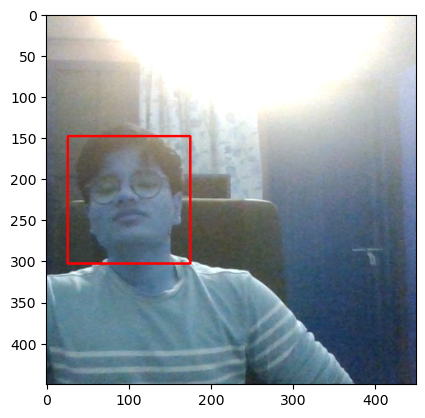

In [235]:
cv2.rectangle(augmented['image'], 
              tuple(np.multiply(augmented['bboxes'][0][:2], [450,450]).astype(int)),
              tuple(np.multiply(augmented['bboxes'][0][2:], [450,450]).astype(int)), 
                    (255,0,0), 2)

plt.imshow(augmented['image'])

**Our Data Augmentation Pipeline**

In [239]:
for partition in ['train','test','val']: 
    for image in os.listdir(os.path.join('data', partition, 'images')):
        img = cv2.imread(os.path.join('data', partition, 'images', image))

        coords = [0,0,0.00001,0.00001]
        label_path = os.path.join('data', partition, 'labels', f'{image.split(".")[0]}.json')
        if os.path.exists(label_path):
            with open(label_path, 'r') as f:
                label = json.load(f)

            coords[0] = label['shapes'][0]['points'][0][0]
            coords[1] = label['shapes'][0]['points'][0][1]
            coords[2] = label['shapes'][0]['points'][1][0]
            coords[3] = label['shapes'][0]['points'][1][1]
            coords = list(np.divide(coords, [640,480,640,480]))

        try: 
            for x in range(60):
                augmented = augmentor(image=img, bboxes=[coords], class_labels=['face'])
                cv2.imwrite(os.path.join('aug_data', partition, 'images', f'{image.split(".")[0]}.{x}.jpg'), augmented['image'])

                annotation = {}
                annotation['image'] = image

                if os.path.exists(label_path):
                    if len(augmented['bboxes']) == 0: 
                        annotation['bbox'] = [0,0,0,0]
                        annotation['class'] = 0 
                    else: 
                        annotation['bbox'] = augmented['bboxes'][0]
                        annotation['class'] = 1
                else: 
                    annotation['bbox'] = [0,0,0,0]
                    annotation['class'] = 0 


                with open(os.path.join('aug_data', partition, 'labels', f'{image.split(".")[0]}.{x}.json'), 'w') as f:
                    json.dump(annotation, f)

        except Exception as e:
            print(e)

**Load our Agumented Images to Tensorflow Dataset**

In [244]:
def preprocess_image(file_path, target_size=(120, 120)):
    image = load_image(file_path)
    image = tf.image.resize(image, target_size)
    image = image / 255.0  # Normalize to [0,1] range
    return image

In [254]:
train_path = 'aug_data/train/images/*.jpg'
test_path = 'aug_data/test/images/*.jpg'
val_path = 'aug_data/val/images/*.jpg'

In [258]:
train_images = (tf.data.Dataset.list_files(train_path, shuffle=False)
                .map(preprocess_image, num_parallel_calls=tf.data.AUTOTUNE))
test_images = (tf.data.Dataset.list_files(test_path, shuffle=False)
               .map(preprocess_image, num_parallel_calls=tf.data.AUTOTUNE))

val_images = (tf.data.Dataset.list_files(val_path, shuffle=False)
              .map(preprocess_image, num_parallel_calls=tf.data.AUTOTUNE))

**Preparing our Label and mapping it to our Images**

In [264]:
def load_labels(label_path):
    with open(label_path.numpy(), 'r', encoding = "utf-8") as f:
        label = json.load(f)
        
    return [label['class']], label['bbox']

In [266]:
def tf_load_labels(label_path):
    class_label, bbox = tf.py_function(load_labels, [label_path], [tf.uint8, tf.float16])
    class_label.set_shape([1])  # Set the expected shape
    bbox.set_shape([4])  # Assume bbox is a list of 4 float values
    return class_label, bbox

In [268]:
train_label_path = 'aug_data/train/labels/*.json'
test_label_path = 'aug_data/test/labels/*.json'
val_label_path = 'aug_data/val/labels/*.json'

In [272]:
train_labels = (tf.data.Dataset.list_files(train_label_path, shuffle=False)
                .map(tf_load_labels, num_parallel_calls=tf.data.AUTOTUNE))

test_labels = (tf.data.Dataset.list_files(test_label_path, shuffle=False)
               .map(tf_load_labels, num_parallel_calls=tf.data.AUTOTUNE))

val_labels = (tf.data.Dataset.list_files(val_label_path, shuffle=False)
              .map(tf_load_labels, num_parallel_calls=tf.data.AUTOTUNE))

In [274]:
sample_label = train_labels.as_numpy_iterator().next()
sample_label

(array([0], dtype=uint8), array([0., 0., 0., 0.], dtype=float16))

In [277]:
len(train_images), len(train_labels), len(test_images), len(test_labels), len(val_images), len(val_labels)

(5760, 5760, 720, 720, 720, 720)

**Now we combine our Images and labels for AI model to learn**

In [280]:
def prepare_dataset(images, labels, shuffle_buffer, batch_size=8, prefetch_buffer=4):
    dataset = tf.data.Dataset.zip((images, labels))
    dataset = dataset.shuffle(shuffle_buffer)
    dataset = dataset.batch(batch_size)
    dataset = dataset.prefetch(prefetch_buffer)
    return dataset

In [282]:
train = prepare_dataset(train_images, train_labels, shuffle_buffer=5000)
test = prepare_dataset(test_images, test_labels, shuffle_buffer=1300)
val = prepare_dataset(val_images, val_labels, shuffle_buffer=1000)

In [286]:
for batch in train.take(1):
    images, labels = batch
    print(images.shape)

(8, 120, 120, 3)


**Verify and Veiwing iamges**

In [295]:
data_samples = train.as_numpy_iterator()

In [297]:
res = data_samples.next()

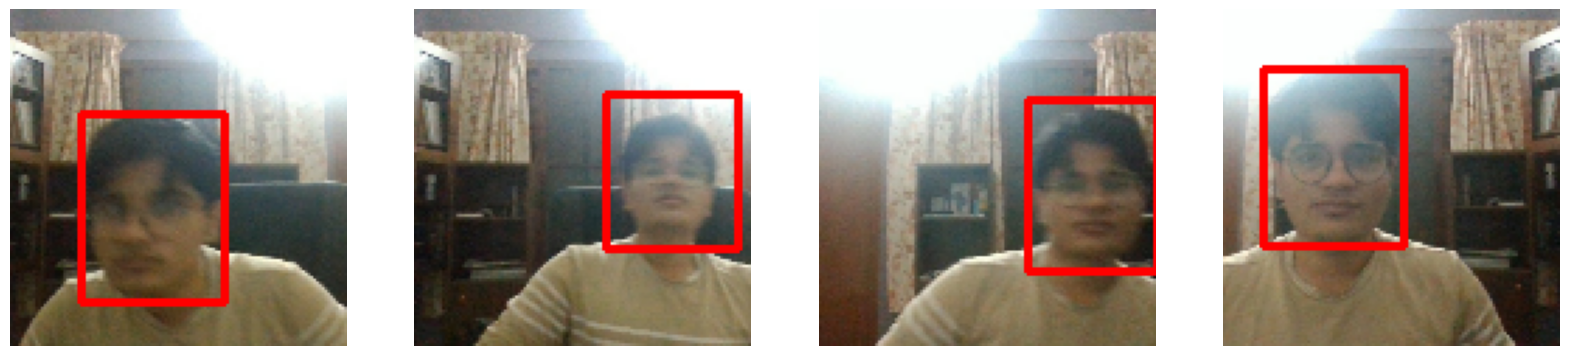

In [298]:
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for idx in range(4):
    sample_image = res[0][idx] 
    sample_image = (sample_image * 255).astype(np.uint8)  # Convert to uint8 for visualization
    sample_coords = res[1][1][idx]
    top_left = tuple(np.multiply(sample_coords[:2], [120, 120]).astype(int))
    bottom_right = tuple(np.multiply(sample_coords[2:], [120, 120]).astype(int))
    cv2.rectangle(sample_image, top_left, bottom_right, (255, 0, 0), 2)
    ax[idx].imshow(sample_image)
    ax[idx].axis('off') 
plt.show()

**Buliding Neural Network**

In [304]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Dense, GlobalMaxPooling2D
from tensorflow.keras.applications import VGG16

In [306]:
vgg = VGG16(include_top=False)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 10s 0us/step


In [308]:
vgg.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, None, None, 3)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, None, None, 64) │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, None, None, 64) │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, None, None, 64) │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, None, None,     │        73,856 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, None, None,     │       147,584 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, None, None,     │             0 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, None, None,     │       295,168 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, None, None,     │       590,080 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, None, None,     │       590,080 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, None, None,     │             0 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, None, None,     │     1,180,160 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, None, None,     │             0 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │             

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [310]:
def build_model(): 
    input_layer = Input(shape=(120,120,3))
    vgg = VGG16(include_top=False)(input_layer)
    # Classification Model  
    f1 = GlobalMaxPooling2D()(vgg)
    class1 = Dense(2048, activation='relu')(f1)
    class2 = Dense(1, activation='sigmoid')(class1)
    # Bounding box model
    f2 = GlobalMaxPooling2D()(vgg)
    regress1 = Dense(2048, activation='relu')(f2)
    regress2 = Dense(4, activation='sigmoid')(regress1)
    facetracker = Model(inputs=input_layer, outputs=[class2, regress2])
    return facetracker

In [312]:
facetracker = build_model()

In [314]:
facetracker.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 120, 120,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ vgg16 (Functional)  │ (None, 3, 3, 512) │ 14,714,688 │ input_layer_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_max_pooling… │ (None, 512)       │          0 │ vgg16[0][0]       │
│ (GlobalMaxPooling2… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_max_pooling… │ (None, 512)       │          0 │ vgg16[0][0]       │
│ (GlobalMaxPooling2… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 2048)      │  1,050,624 │ global_max_pooli… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 2048)      │  1,050,624 │ global_max_pooli… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 1)         │      2,049 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 4)         │      8,196 │ dense_2[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 16,826,181 (64.19 MB)

 Trainable params: 16,826,181 (64.19 MB)

 Non-trainable params: 0 (0.00 B)

In [316]:
X, y = train.as_numpy_iterator().next()

In [318]:
X.shape

(8, 120, 120, 3)

In [320]:
classes, coords = facetracker.predict(X)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 747ms/step


In [322]:
classes, coords

(array([[0.49711233],
        [0.5186103 ],
        [0.5115162 ],
        [0.5275539 ],
        [0.5150497 ],
        [0.55758214],
        [0.47576708],
        [0.5827658 ]], dtype=float32),
 array([[0.47528946, 0.5314623 , 0.33692056, 0.4073382 ],
        [0.47094238, 0.50408363, 0.38681006, 0.3824844 ],
        [0.46711373, 0.54644847, 0.38617286, 0.36087325],
        [0.5177362 , 0.4937774 , 0.41295075, 0.37462762],
        [0.50103307, 0.48084754, 0.38383508, 0.3644879 ],
        [0.47271952, 0.5578028 , 0.38744822, 0.32921946],
        [0.5142648 , 0.48859674, 0.3998175 , 0.37990606],
        [0.4310447 , 0.50958323, 0.38004866, 0.3740843 ]], dtype=float32))

In [324]:
batches_per_epoch = len(train)
lr_decay = (1./0.75 -1)/batches_per_epoch

In [326]:
opt = tf.keras.optimizers.Adam(learning_rate=0.0001, decay=lr_decay)

C:\Users\ebeng\anaconda3\Lib\site-packages\keras\src\optimizers\base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


In [328]:
def localization_loss(y_true, yhat):            
    delta_coord = tf.reduce_sum(tf.square(y_true[:,:2] - yhat[:,:2]))
                  
    h_true = y_true[:,3] - y_true[:,1] 
    w_true = y_true[:,2] - y_true[:,0] 

    h_pred = yhat[:,3] - yhat[:,1] 
    w_pred = yhat[:,2] - yhat[:,0] 
    
    delta_size = tf.reduce_sum(tf.square(w_true - w_pred) + tf.square(h_true-h_pred))
    
    return delta_coord + delta_size

In [330]:
classloss = tf.keras.losses.BinaryCrossentropy()
regressloss = localization_loss

In [332]:
localization_loss(y[1], coords)

<tf.Tensor: shape=(), dtype=float32, numpy=4.8807864>

In [334]:
classloss(y[0], classes)

<tf.Tensor: shape=(), dtype=float32, numpy=0.726192>

In [336]:
regressloss(y[1], coords)

<tf.Tensor: shape=(), dtype=float32, numpy=4.8807864>

**Neural Network Model**

In [341]:
class FaceTracker(Model):
    def __init__(self, eyetracker, **kwargs):
        super().__init__(**kwargs)
        self.model = eyetracker

    def compile(self, optimizer, class_loss, localization_loss, **kwargs):
        super().compile(**kwargs)
        self.optimizer = optimizer
        self.class_loss = class_loss
        self.localization_loss = localization_loss

    def train_step(self, data):
        X, y = data
        
        with tf.GradientTape() as tape:
            classes, coords = self.model(X, training=True)
            
            batch_class_loss = self.class_loss(y[0], classes)
            batch_localization_loss = self.localization_loss(tf.cast(y[1], tf.float32), coords)
            
            total_loss = batch_localization_loss + 0.5 * batch_class_loss
        
        gradients = tape.gradient(total_loss, self.model.trainable_variables)
        self.optimizer.apply_gradients(zip(gradients, self.model.trainable_variables))
        
        return {
            "total_loss": total_loss,
            "class_loss": batch_class_loss,
            "regress_loss": batch_localization_loss
        }

    def test_step(self, data):
        X, y = data
        
        classes, coords = self.model(X, training=False)
        
        batch_class_loss = self.class_loss(y[0], classes)
        batch_localization_loss = self.localization_loss(tf.cast(y[1], tf.float32), coords)
        
        total_loss = batch_localization_loss + 0.5 * batch_class_loss
        
        return {
            "total_loss": total_loss,
            "class_loss": batch_class_loss,
            "regress_loss": batch_localization_loss
        }
    
    def call(self, X, **kwargs):
        return self.model(X, **kwargs)


In [343]:
model = FaceTracker(facetracker)

In [345]:
model.compile(opt, classloss, regressloss)

**Now we train the Model with out Data**

In [348]:
logdir='logs'

In [350]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [353]:
hist = model.fit(train, 
                 epochs=10, 
                 validation_data=val, 
                 callbacks=[tensorboard_callback])

Epoch 1/10
720/720 ━━━━━━━━━━━━━━━━━━━━ 1013s 1s/step - class_loss: 0.0507 - regress_loss: 0.2199 - total_loss: 0.2452 - val_class_loss: 9.0245e-05 - val_regress_loss: 0.0781 - val_total_loss: 0.0781
Epoch 2/10
720/720 ━━━━━━━━━━━━━━━━━━━━ 1010s 1s/step - class_loss: 0.0023 - regress_loss: 0.0326 - total_loss: 0.0338 - val_class_loss: 7.2751e-05 - val_regress_loss: 0.1711 - val_total_loss: 0.1711
Epoch 3/10
720/720 ━━━━━━━━━━━━━━━━━━━━ 1001s 1s/step - class_loss: 0.0047 - regress_loss: 0.0277 - total_loss: 0.0300 - val_class_loss: 1.6142e-04 - val_regress_loss: 0.0592 - val_total_loss: 0.0593
Epoch 4/10
720/720 ━━━━━━━━━━━━━━━━━━━━ 1135s 2s/step - class_loss: 0.0014 - regress_loss: 0.0152 - total_loss: 0.0159 - val_class_loss: 1.6419e-04 - val_regress_loss: 0.0650 - val_total_loss: 0.0651
Epoch 5/10
720/720 ━━━━━━━━━━━━━━━━━━━━ 1385s 2s/step - class_loss: 0.0018 - regress_loss: 0.0169 - total_loss: 0.0177 - val_class_loss: 1.5178e-04 - val_regress_loss: 0.0472 - val_total_loss: 0.0473


In [415]:
hist.history

{'class_loss': [0.0003648399142548442,
  0.00016386908828280866,
  0.00027528704958967865,
  0.00013365712948143482,
  0.0001779181184247136,
  0.0302029550075531,
  0.0024562752805650234,
  0.00013494551240000874,
  0.0001721665175864473,
  3.620505231083371e-05],
 'regress_loss': [0.030721476301550865,
  0.06507962942123413,
  0.011305999010801315,
  0.012535035610198975,
  0.011390876024961472,
  0.4500943422317505,
  0.029877685010433197,
  0.020862620323896408,
  0.033839818090200424,
  0.009042276069521904],
 'total_loss': [0.030903896316885948,
  0.0651615634560585,
  0.011443642899394035,
  0.012601864524185658,
  0.011479835025966167,
  0.46519583463668823,
  0.031105821952223778,
  0.02093009278178215,
  0.03392590209841728,
  0.009060378186404705],
 'val_class_loss': [9.024505561683327e-05,
  7.275086682057008e-05,
  0.000161416144692339,
  0.00016418527229689062,
  0.0001517804485047236,
  0.030354876071214676,
  0.0017749052494764328,
  0.00019314803648740053,
  0.00048253

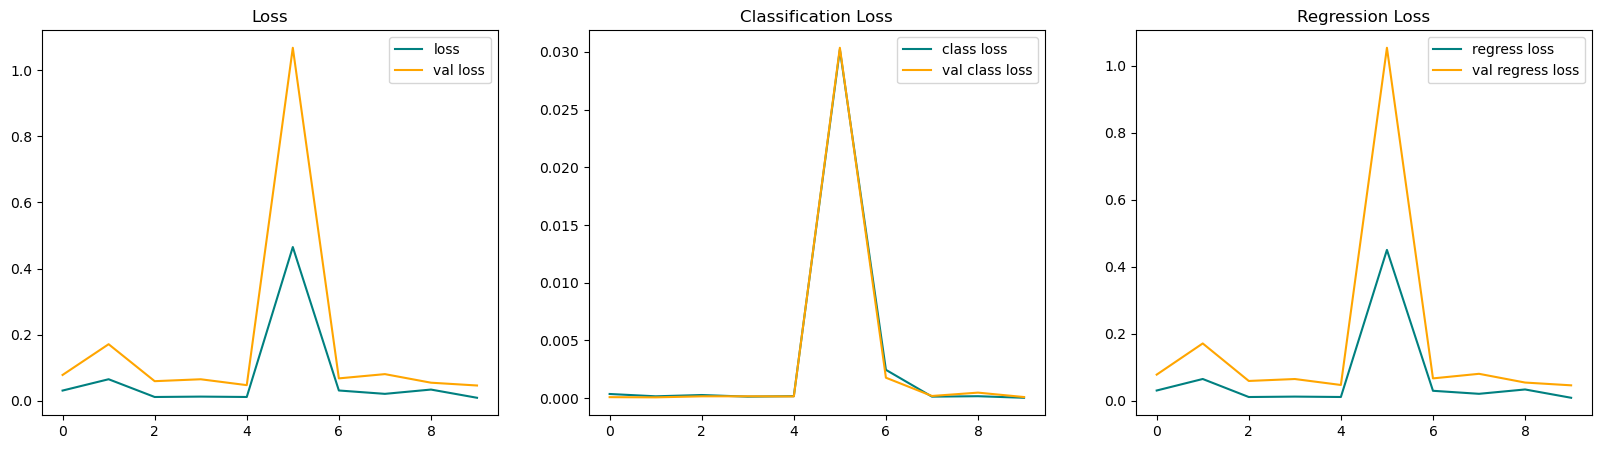

In [417]:
fig, ax = plt.subplots(ncols=3, figsize=(20,5))

ax[0].plot(hist.history['total_loss'], color='teal', label='loss')
ax[0].plot(hist.history['val_total_loss'], color='orange', label='val loss')
ax[0].title.set_text('Loss')
ax[0].legend()

ax[1].plot(hist.history['class_loss'], color='teal', label='class loss')
ax[1].plot(hist.history['val_class_loss'], color='orange', label='val class loss')
ax[1].title.set_text('Classification Loss')
ax[1].legend()

ax[2].plot(hist.history['regress_loss'], color='teal', label='regress loss')
ax[2].plot(hist.history['val_regress_loss'], color='orange', label='val regress loss')
ax[2].title.set_text('Regression Loss')
ax[2].legend()

plt.show()

In [429]:
test_data = test.as_numpy_iterator()

In [431]:
test_sample = test_data.next()

In [432]:
yhat = facetracker.predict(test_sample[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step


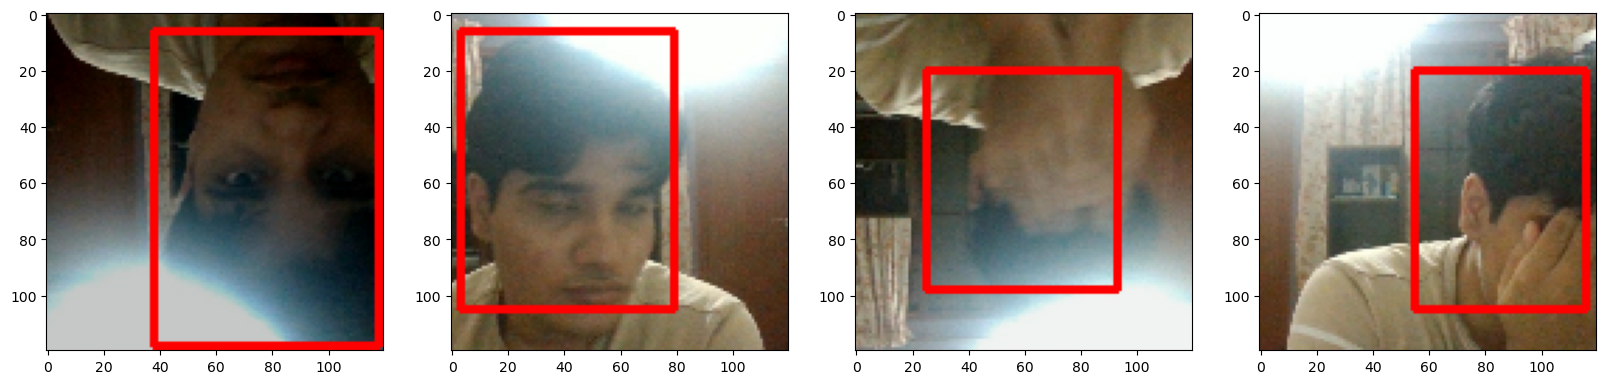

In [434]:
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for idx in range(4):
    # Get the image and coordinates
    sample_image = test_sample[0][idx]
    sample_coords = yhat[1][idx]
    if yhat[0][idx] > 0.9:
        # Convert the image to writable format
        sample_image_writable = np.copy(sample_image)

        # Draw the rectangle
        cv2.rectangle(
            sample_image_writable, 
            tuple(np.multiply(sample_coords[:2], sample_image.shape[:2][::-1]).astype(int)),
            tuple(np.multiply(sample_coords[2:], sample_image.shape[:2][::-1]).astype(int)), 
            (255, 0, 0), 2
        )

        # Ensure image values are in the range [0, 1] for imshow
        ax[idx].imshow(np.clip(sample_image_writable, 0, 1))
    else:
        # Ensure image values are in the range [0, 1] for imshow
        ax[idx].imshow(np.clip(sample_image, 0, 1))

# Show the plot
plt.show()

In [437]:
from tensorflow.keras.models import load_model

In [442]:
facetracker.save('FaceTracker.h5')

In [444]:
facetracker = load_model('FaceTracker.h5')

In [ ]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    _ , frame = cap.read()
    frame = frame[50:500, 50:500,:]
    
    rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    resized = tf.image.resize(rgb, (120,120))
    
    yhat = facetracker.predict(np.expand_dims(resized/255,0))
    sample_coords = yhat[1][0]
    
    if yhat[0] > 0.5: 
        # Controls the main rectangle
        cv2.rectangle(frame, 
                      tuple(np.multiply(sample_coords[:2], [450,450]).astype(int)),
                      tuple(np.multiply(sample_coords[2:], [450,450]).astype(int)), 
                            (255,0,0), 2)
        # Controls the label rectangle
        cv2.rectangle(frame, 
                      tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int), 
                                    [0,-30])),
                      tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int),
                                    [80,0])), 
                            (255,0,0), -1)
        
        # Controls the text rendered
        cv2.putText(frame, 'face', tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int),
                                               [0,-5])),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
    
    cv2.imshow('FaceTrack', frame)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()